In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

data = pd.read_csv('./data/layer_324.csv')

data.head()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
0,1.2730e+08,26.035,-66.386,12.96,324,800.0,795.0,1594.7,0,131,0.0000,0.0
1,1.2730e+08,26.043,-66.392,12.96,324,798.0,794.0,1593.3,0,131,0.0082,10.0
2,1.2730e+08,26.047,-66.398,12.96,324,814.0,799.0,1608.5,0,131,0.0164,20.0
3,1.2730e+08,26.049,-66.404,12.96,324,829.0,806.0,1619.4,0,131,0.0246,30.0
4,1.2730e+08,26.057,-66.412,12.96,324,833.0,824.0,1599.8,0,131,0.0328,40.0


Runs test statistic = -227.133
Runs test p-value = 0.000



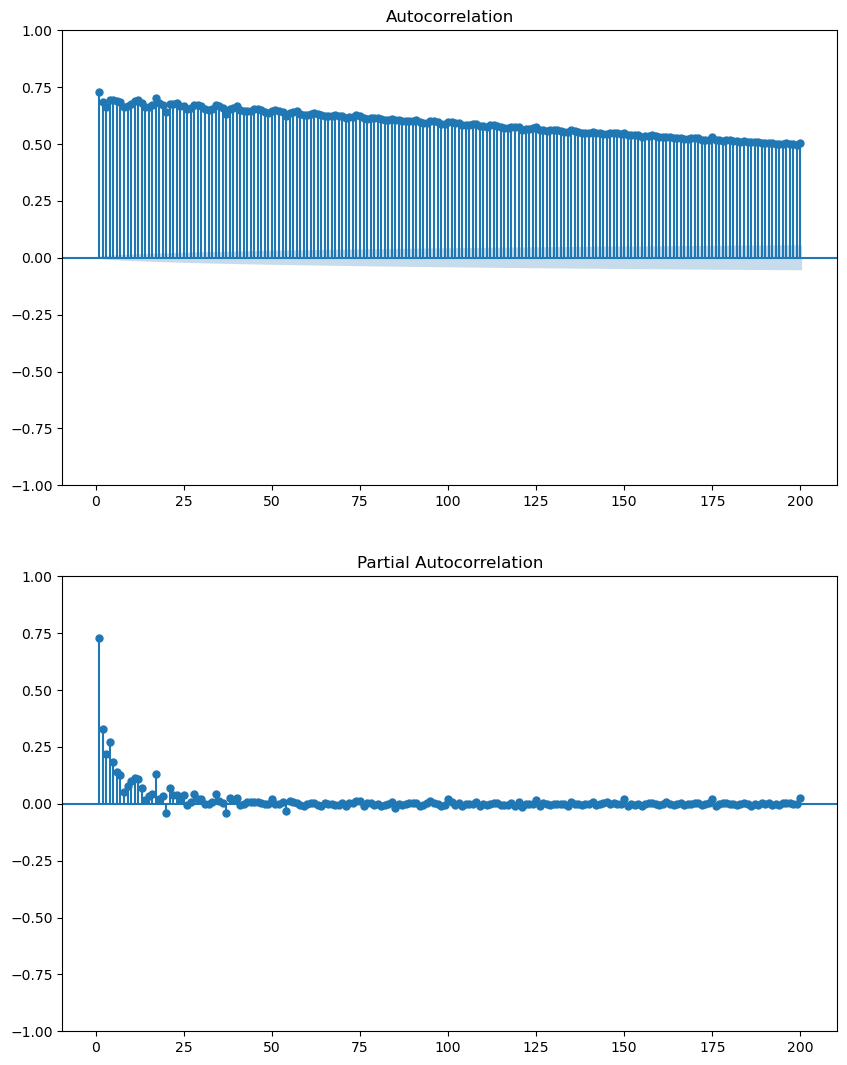

(-227.13295162929526, 0.0)


In [ ]:

_ = qda.Assumptions(data['temp']).independence()


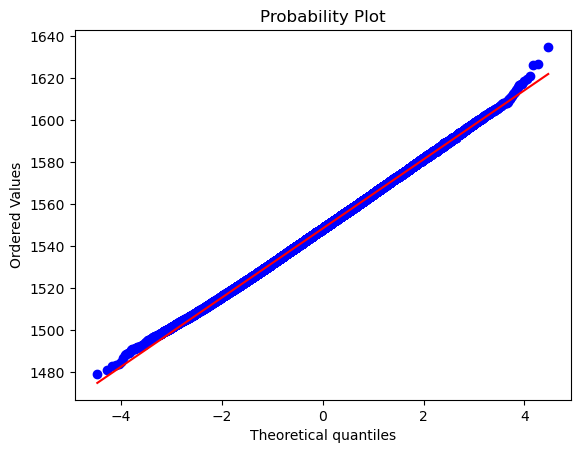

Shapiro-wilk test statistic = 1.000
Shapiro-wilk test p-value = 0.000


/opt/anaconda3/envs/qda/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
_ = qda.Assumptions(data['temp']).normality()

In [39]:
gap_size = 50

# Create a sampled copy of the dataset
sampled_data1 = data.iloc[::gap_size].copy()

# Reset the index to rename observations as 1, 2, 3, 4, ...
sampled_data1.reset_index(drop=True, inplace=True)

# Display the sampled dataset
sampled_data1.head()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
0,127300340.0,26.035,-66.386,12.96,324,800.0,795.0,1594.7,0,131,0.00000,0.0
1,127302880.0,26.273,-66.511,12.96,324,872.0,874.0,1585.2,1,131,0.17862,250.0
2,127304940.0,26.140,-66.201,12.96,324,871.0,872.0,1586.4,2,131,0.16065,200.0
3,127305440.0,26.401,-66.499,12.96,324,893.0,903.0,1575.5,2,131,0.56228,700.0
4,127307990.0,26.435,-66.389,12.96,324,896.0,897.0,1586.5,3,131,0.33335,440.0


Runs test statistic = -27.504
Runs test p-value = 0.000



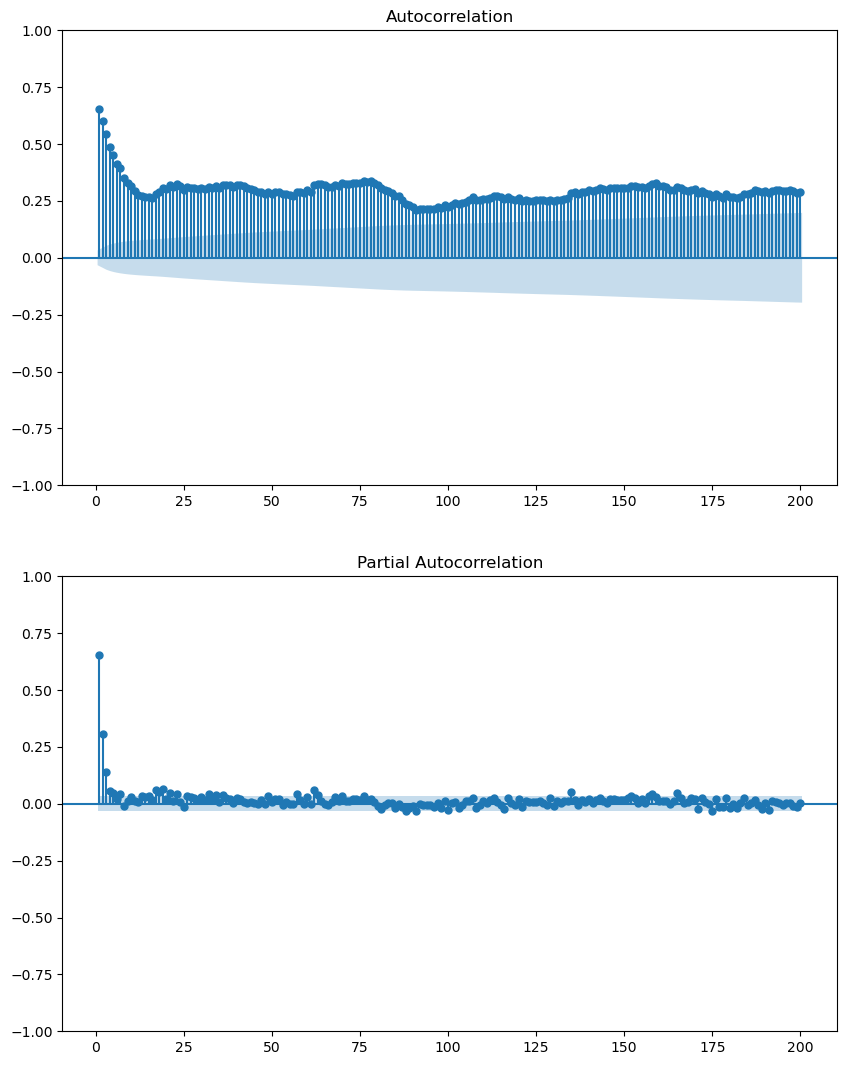

(-27.503696615590812, 1.5857100485887605e-166)


In [ ]:
_ = qda.Assumptions(sampled_data1['temp']).independence()


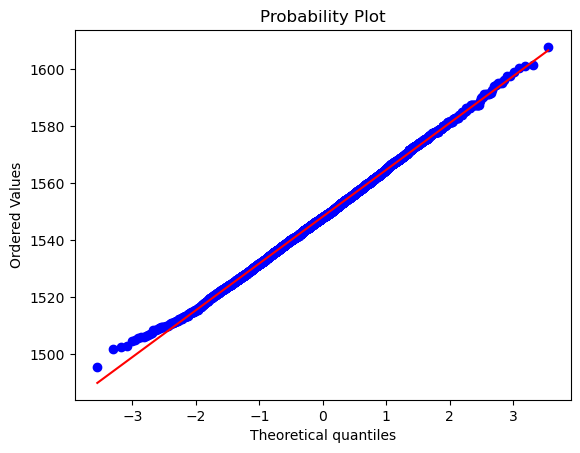

Shapiro-wilk test statistic = 0.999
Shapiro-wilk test p-value = 0.048


In [41]:
_ = qda.Assumptions(sampled_data1['temp']).normality()

In [42]:
from scipy.stats import kstest

# Supponiamo che 'data' sia il tuo array numpy con più di 5000 osservazioni
stat, p = kstest(sampled_data1['temp'], 'norm')
print(f"Statistic KS: {stat:.3f}, p-value: {p:.3f}")

alpha = 0.05
if p > alpha:
    print("I dati sembrano essere distribuiti normalmente (non possiamo rifiutare l'ipotesi nulla).")
else:
    print("I dati non sembrano essere distribuiti normalmente (rifiutiamo l'ipotesi nulla).")

Statistic KS: 1.000, p-value: 0.000
I dati non sembrano essere distribuiti normalmente (rifiutiamo l'ipotesi nulla).


In [45]:
# fit model ARIMA with constant term
model = qda.ARIMA(sampled_data1['temp'], order=(0,1,1), add_constant=True)

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef  T-Value  P-Value
const -0.0164   0.0801  -0.2052   0.8374
ma.L1 -0.5960   0.0133 -44.9193   0.0000

RESIDUAL SUM OF SQUARES
-------------------------
    DF          SS       MS
3608.0 509851.0205 141.3113

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square    P-Value
  12     79.0524 6.2555e-12
  24    119.2538 1.3174e-14
  36    126.9034 4.6341e-12
  48    136.8175 1.8154e-10


In [46]:
# fit model ARIMA with constant term
model = qda.ARIMA(sampled_data1['temp'], order=(0,1,1), add_constant=False)

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term   Coef  SE Coef  T-Value  P-Value
ma.L1 -0.596   0.0133 -44.9759      0.0

RESIDUAL SUM OF SQUARES
-------------------------
    DF          SS       MS
3609.0 509857.1124 141.2738

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square    P-Value
  12     79.0424 6.2829e-12
  24    119.2396 1.3251e-14
  36    126.8896 4.6577e-12
  48    136.8026 1.8245e-10


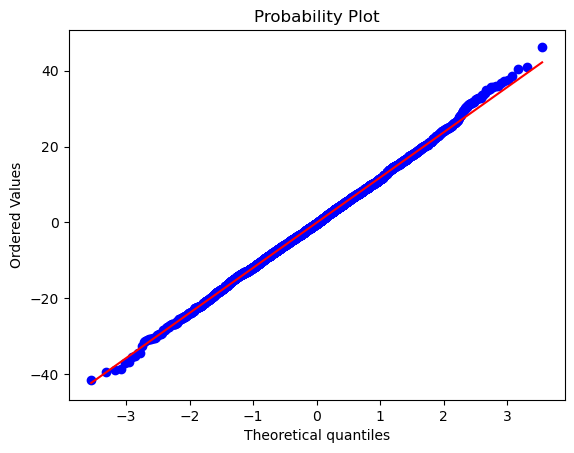

Shapiro-wilk test statistic = 0.999
Shapiro-wilk test p-value = 0.085


In [47]:
#extract the residuals
residuals = model.resid[1:] 

# Perform the Shapiro-Wilk test
_ = qda.Assumptions(residuals).normality()

Runs test statistic = -1.319
Runs test p-value = 0.187



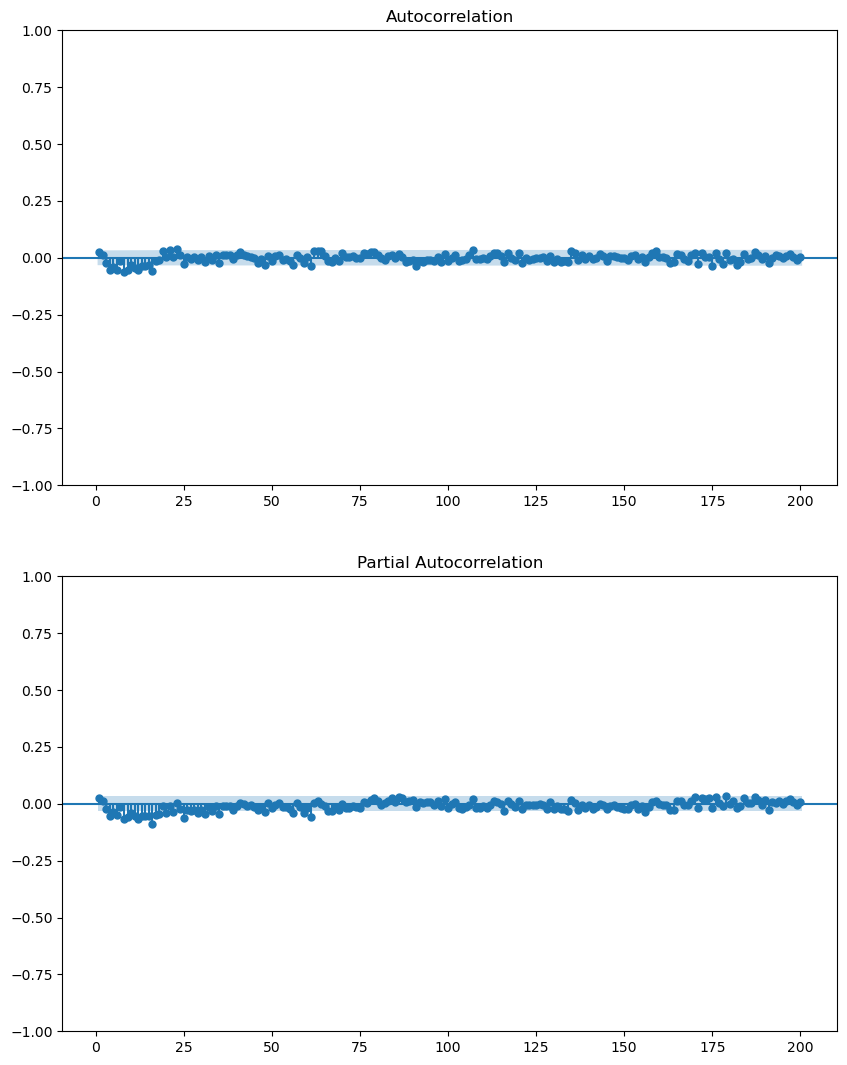

In [48]:
_ = qda.Assumptions(residuals).independence()

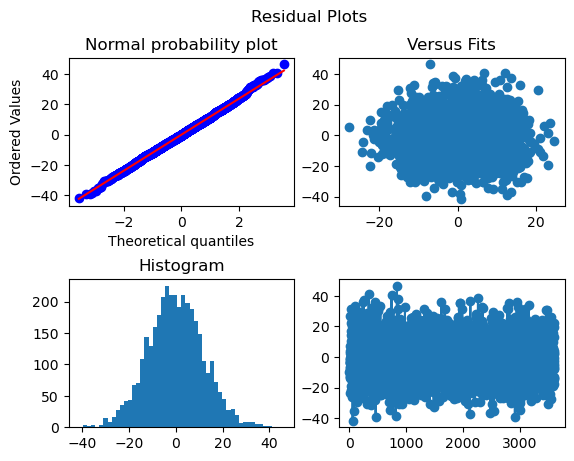

In [49]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues[1:], model.resid[1:])
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals, bins=50)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

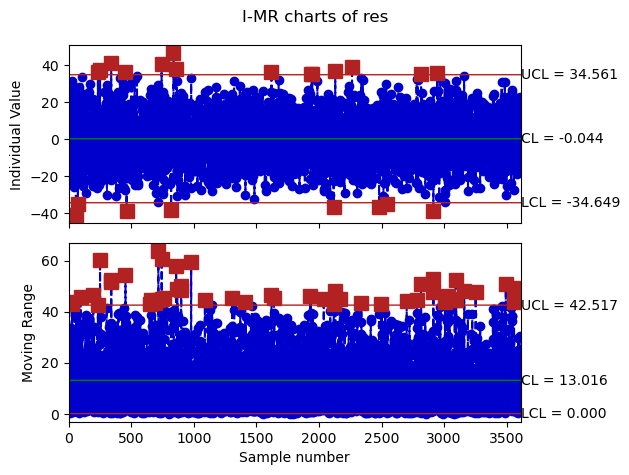

In [50]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

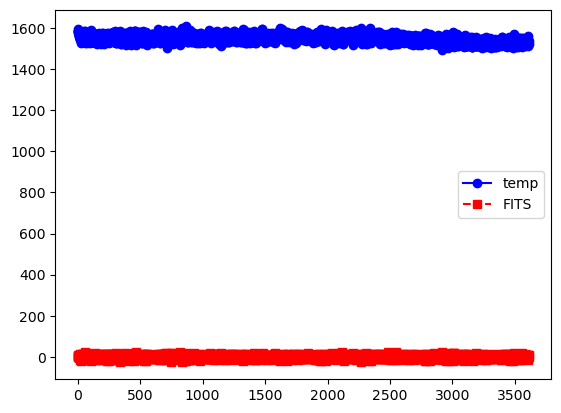

In [51]:
plt.plot(sampled_data1['temp'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

In [56]:
data1 = data.sample(n=5000, random_state=42)  # Randomly sample 5000 rows
data1.head()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
18928,1.2756e+08,26.777,-61.432,12.96,324,919.0,961.0,1539.9,38,131,1.1404,1420.0
156779,1.2909e+08,34.733,-57.267,12.96,324,957.0,1023.0,1517.4,125,131,5.3750,6650.0
161509,1.2915e+08,33.794,-55.417,12.96,324,930.0,978.0,1534.0,130,131,1.2261,1530.0
16499,1.2753e+08,28.162,-63.487,12.96,324,928.0,980.0,1529.7,35,131,4.1836,5240.0
54432,1.2796e+08,34.147,-65.777,12.96,324,916.0,943.0,1556.3,65,131,1.1678,1460.0


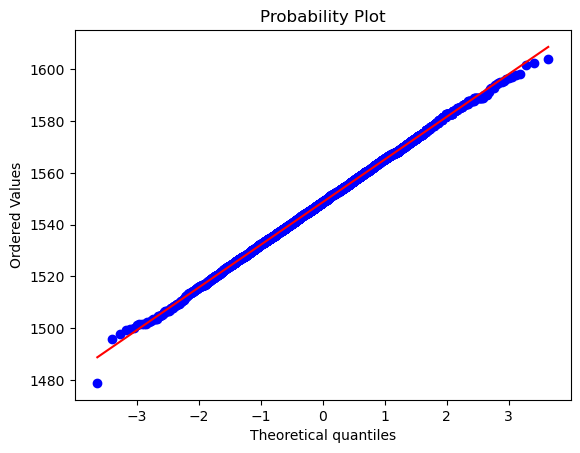

Shapiro-wilk test statistic = 1.000
Shapiro-wilk test p-value = 0.763


In [57]:
_ = qda.Assumptions(data1['temp']).normality()

Runs test statistic = 0.086
Runs test p-value = 0.931



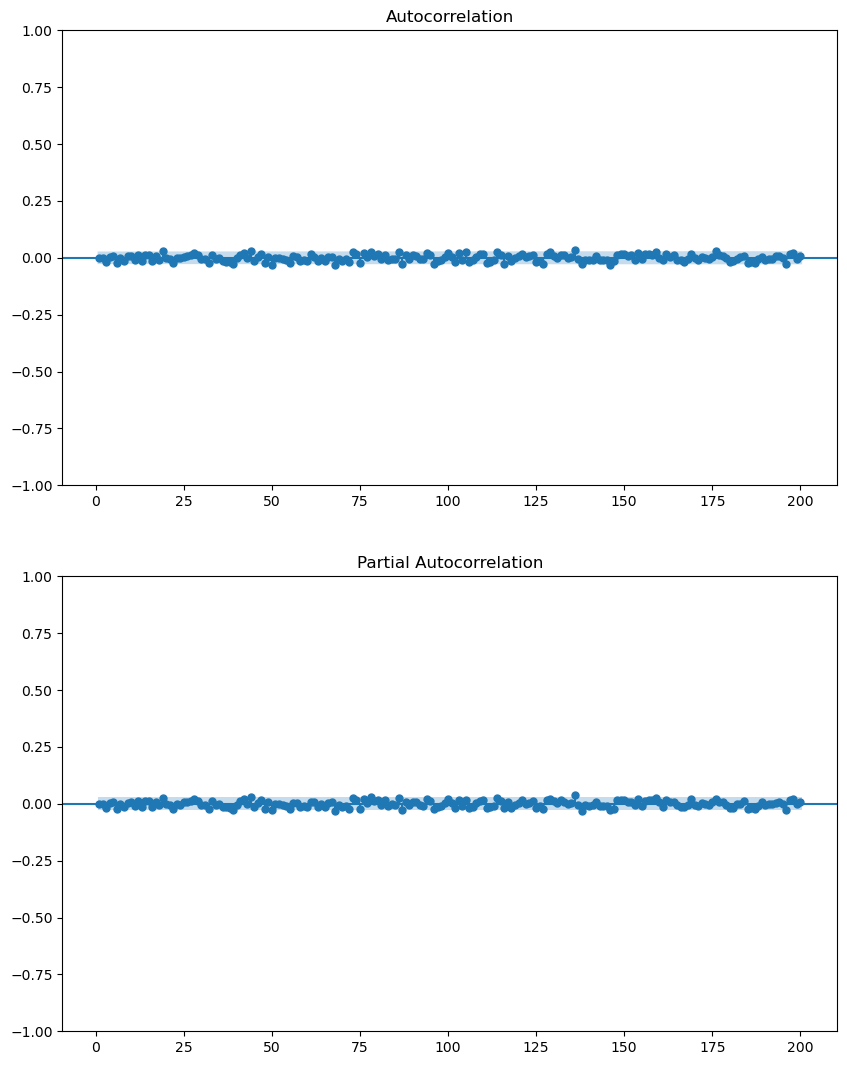

In [58]:
_ = qda.Assumptions(data1['temp']).independence()